In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath('../src'))
from shallowwater import (ModelParams, make_grid, setup_initial_state, zero_forcing,
                          run_model, compute_dt_cfl,animate_eta)
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# --- Tsunami test case (no forcing, no friction, non-rotating) ---

Nx, Ny = 128, 128
Lx, Ly = 4.0e6, 4.0e6     # larger basin (≈ 4000 km x 4000 km)
grid = make_grid(Nx, Ny, Lx, Ly)

# Deep ocean depth for tsunami speed (~200 m/s), no rotation, no friction
params = ModelParams(H=4000.0, g=9.81, rho=1025.0,
                     f0=0.0, beta=0.0, y0=Ly/2,
                     r=0.0, linear=True)

# CFL time step and 12 hours of simulation
dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 12 * 3600.0        # 12 h

# Initial condition: localized uplift (Gaussian) near the west side
ic_fn = lambda g, p: setup_initial_state(
    g, p,
    mode='gaussian_bump',
    amp=1.0,           # meters (deep-ocean amplitude order)
    R=5.0e4,           # ≈ 50 km e-folding radius
    x0=0.20 * Lx,      # near western boundary
    y0=0.50 * Ly       # centered meridionally
)

# No surface forcing for a tsunami propagation test
forcing_fn = lambda t, g, p: zero_forcing(t, g, p)

In [3]:
# Save frequently to capture the leading front well
out = run_model(tmax, dt, grid, params, forcing_fn, ic_fn,
                save_every=3, out_vars=('eta',))

print('Saved steps:', len(out['time']))

Saved steps: 183


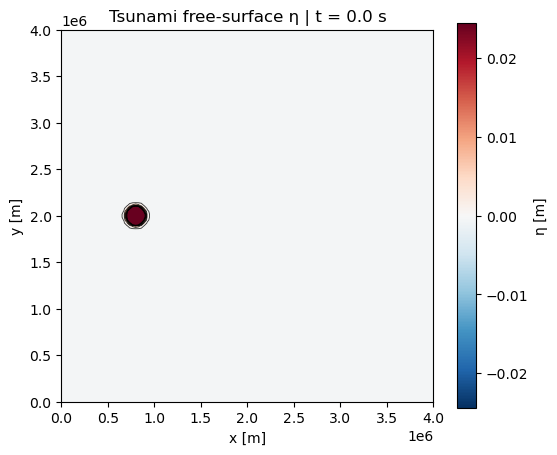

In [4]:
# Quick look animation (if you added visualize.py earlier)
from shallowwater.visualize import animate_eta, animate_eta_spectrum

anim = animate_eta(out, grid, interval=60, title="Tsunami free-surface η")

In [5]:
# Optionally save to a file:
# GIF (no external dependencies)
anim.save("eta_03.gif", fps=10)

# MP4 (requires ffmpeg available on your PATH)
# anim.save("eta.mp4", fps=20)


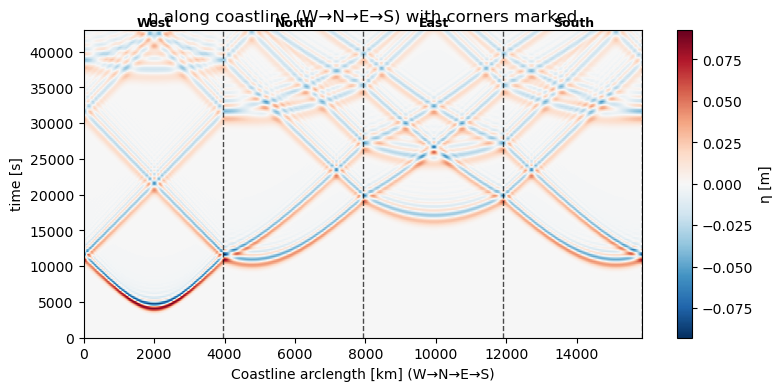

In [6]:
from shallowwater.visualize import coast_hovmoller

fig = coast_hovmoller(out, grid, units_x="km",
                      title="η along coastline (W→N→E→S) with corners marked")

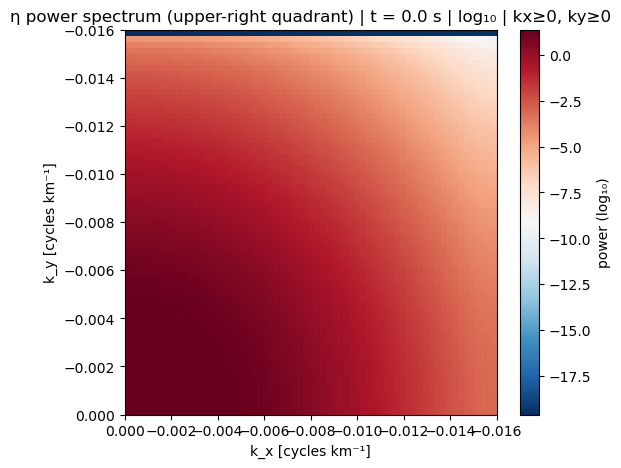

In [7]:
from shallowwater.visualize import animate_eta_spectrum

spec = animate_eta_spectrum(out, grid, quadrant="ur", log10=True, interval=80,
                            title="η power spectrum (upper-right quadrant)")
# spec  # displays inline
# spec.save("eta_spectrum_ur.gif", fps=20)
